# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [957]:
#%%pycodestyle


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics, cluster
import time
from sklearn import preprocessing

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [966]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        if init == 'random':
            self.init = self.__set_centr
        elif init == 'k-means':
            self.init = self.__set_centr_plusplus
        else:
            print('Unknown initialization method')

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        self.centroids = self.init(X)

        for i in range(self.max_iter):
            self.labels = sk.metrics.pairwise_distances_argmin(
                X, self.centroids)
            for label in range(self.k):
                cluster = X[label == self.labels]
                if cluster.shape[0] != 0:
                    self.centroids[label] = np.mean(cluster, axis=0)

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        return sk.metrics.pairwise_distances_argmin(X, self.centroids)

    def __set_centr_plusplus(self, X):
        centroids = np.empty((self.k, X.shape[1]))
        centroid_idx = np.random.choice(X.shape[0])
        centroids[0] = X[centroid_idx]
        for i in range(1, self.k):
            weights = sk.metrics.pairwise_distances_argmin_min(
                X, centroids[:i])[1]
            weights /= np.sum(weights)
            centroids[i] = X[np.random.choice(X.shape[0], p=weights)]
        return centroids

    def __set_centr(self, X):
        centroid_idx = np.random.choice(X.shape[0], size=self.k, replace=False)
        return X[centroid_idx]


class MyMiniBatchKmeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None,
                 init='random', batch_size=100):
        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X, y=None):

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        self.centroids = self.init(X)

        v = np.zeros(self.k)
        np.random.shuffle(X)
        ind = 0
        for i in range(self.max_iter):
            if ind * self.batch_size >= X.shape[0]:
                ind = 0
            elif (ind + 1) * self.batch_size >= X.shape[0]:
                batch = X[ind * self.batch_size:]
            else:
                batch = X[ind * self.batch_size:(ind + 1) * self.batch_size]
            ind += 1
            batch_labels = sk.metrics.pairwise_distances_argmin(
                batch, self.centroids)

            for j in range(self.batch_size):
                v[batch_labels[j]] += 1
                learn_rate = 1 / v[batch_labels[j]]
                self.centroids[batch_labels[j]] = (1 - learn_rate) * \
                    self.centroids[batch_labels[j]] + learn_rate * batch[j]

        self.labels = sk.metrics.pairwise_distances_argmin(X, self.centroids)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [784]:
from sklearn.datasets import make_blobs

In [785]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

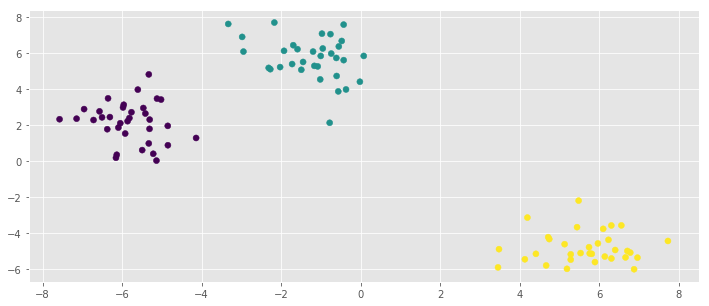

In [786]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

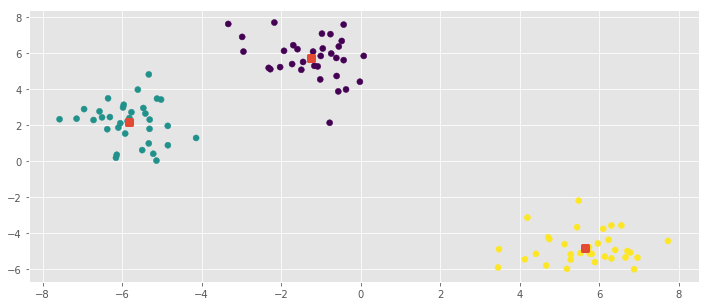

In [802]:
## Работоспособность MyKmeans

myclust = MyKmeans(3, init='random')
myclust.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=myclust.labels)
plt.scatter(myclust.centroids[:, 0], myclust.centroids[:, 1], marker=',', linewidths=3)

plt.show()

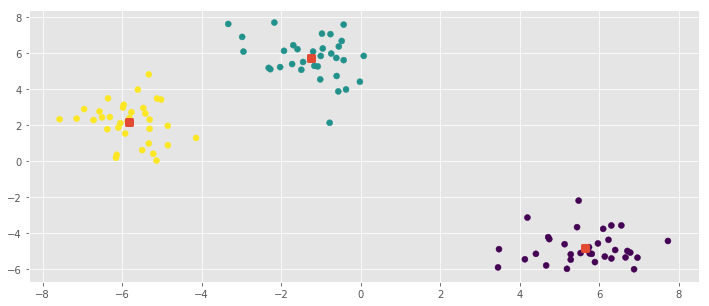

In [803]:
## Работоспособность MyKmeans++

myclust = MyKmeans(3, init='k-means')
myclust.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=myclust.labels)
plt.scatter(myclust.centroids[:, 0], myclust.centroids[:, 1], marker=',', linewidths=3)

plt.show()

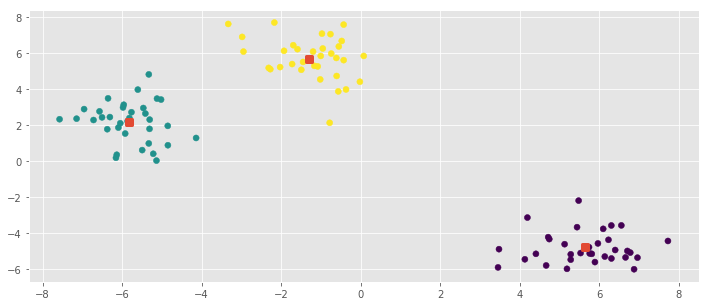

In [804]:
## Работоспособность MyKmeans с MiniBatchMyKmeans

myclust = MyMiniBatchKmeans(3, init='random', batch_size=2)
myclust.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=myclust.labels)
plt.scatter(myclust.centroids[:, 0], myclust.centroids[:, 1], marker=',', linewidths=3)

plt.show()

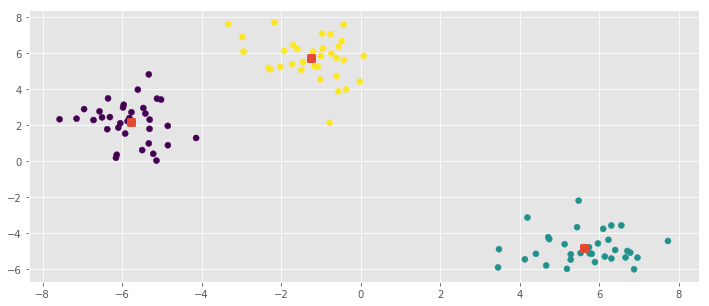

In [805]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans

myclust = MyMiniBatchKmeans(3, init='k-means', batch_size=2)
myclust.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=myclust.labels)
plt.scatter(myclust.centroids[:, 0], myclust.centroids[:, 1], marker=',', linewidths=3)

plt.show()

In [806]:
## Время выполнения алгоритма Kmeans из sklearn

clf = cluster.KMeans(n_clusters=3, max_iter=1000, tol=0)
%time clf.fit(X)

CPU times: user 1.32 s, sys: 3.9 ms, total: 1.32 s
Wall time: 1.32 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0, verbose=0)

In [807]:
## Время выполнения алгоритма MyKmeans

myclf = MyKmeans(3, init='random')
%time myclust.fit(X)

CPU times: user 182 ms, sys: 4.04 ms, total: 186 ms
Wall time: 187 ms


In [808]:
## Время выполнения алгоритма MyKmeans++

myclf = MyKmeans(3, init='k-means')
%time myclust.fit(X)

CPU times: user 145 ms, sys: 0 ns, total: 145 ms
Wall time: 145 ms


In [809]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans

myclf = MyMiniBatchKmeans(3, init='random', batch_size=2)
%time myclust.fit(X)

CPU times: user 138 ms, sys: 0 ns, total: 138 ms
Wall time: 135 ms


In [810]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

myclf = MyMiniBatchKmeans(3, init='k-means', batch_size=2)
%time myclust.fit(X)

CPU times: user 144 ms, sys: 28 µs, total: 144 ms
Wall time: 143 ms


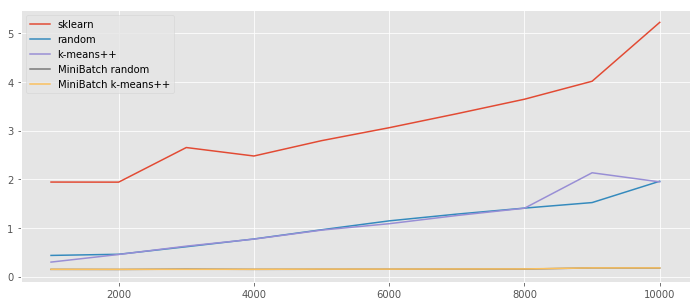

In [825]:
#%%pycodestyle

clf = [cluster.KMeans(n_clusters=3, max_iter=1000, tol=0),
       MyKmeans(k=3, init='random', max_iter=1000),
       MyKmeans(k=3, init='k-means', max_iter=1000),
       MyMiniBatchKmeans(k=3, init='random', max_iter=1000, batch_size=10),
       MyMiniBatchKmeans(k=3, init='k-means', max_iter=1000, batch_size=10)]

time_clf = [[], [], [], [], []]
sample_num = []

for n_samples in range(1000, 10001, 1000):
    X, _ = make_blobs(n_samples=n_samples, n_features=2,
                      centers=3, cluster_std=1, center_box=(-10.0, 10.0),
                      shuffle=False, random_state=4321)

    sample_num.append(n_samples)
    for i in range(len(clf)):
        t = time.time()
        clf[i].fit(X)
        time_clf[i].append(time.time() - t)

for i in range(len(clf)):
    plt.plot(sample_num, time_clf[i])

plt.legend(['sklearn', 'random', 'k-means++',
           'MiniBatch random', 'MiniBatch k-means++'])

plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [931]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [932]:
df_sns.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [933]:
df_sns = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
df_sns.columns

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [847]:
df_sns.shape[1]

36

In [967]:
X = df_sns.values
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [949]:
#%%pycodestyle


def info(clf, X, n=5):
    clf.fit(X)
    clusters = np.argsort(np.bincount(clf.labels))[::-1]
    j = 0
    for i in clusters:
        print('------------------------------------')
        print("Кластер {}. \nКоличество объектов: {}.".format(
            j+1, X[clf.labels == i].shape[0]))
        j += 1
        f = np.argsort(X[clf.labels == i].mean(axis=0))[-5:]
        print(df_sns.columns[f].values)

In [950]:
## MyKMeans

clf = MyKmeans(k=9)
info(clf, X)

------------------------------------
Кластер 1. 
Количество объектов: 19564.
['bible' 'death' 'jesus' 'tennis' 'blonde']
------------------------------------
Кластер 2. 
Количество объектов: 4438.
['dress' 'mall' 'dance' 'cute' 'shopping']
------------------------------------
Кластер 3. 
Количество объектов: 1998.
['sports' 'basketball' 'soccer' 'baseball' 'football']
------------------------------------
Кластер 4. 
Количество объектов: 924.
['drunk' 'sex' 'hair' 'drugs' 'kissed']
------------------------------------
Кластер 5. 
Количество объектов: 839.
['clothes' 'mall' 'shopping' 'abercrombie' 'hollister']
------------------------------------
Кластер 6. 
Количество объектов: 697.
['softball' 'shopping' 'sports' 'basketball' 'volleyball']
------------------------------------
Кластер 7. 
Количество объектов: 571.
['god' 'rock' 'music' 'band' 'marching']
------------------------------------
Кластер 8. 
Количество объектов: 486.
['death' 'church' 'god' 'jesus' 'bible']
-----------------

In [951]:
## MyKMeans++

clf = MyKmeans(k=9, init='k-means')
info(clf, X)

------------------------------------
Кластер 1. 
Количество объектов: 19380.
['drunk' 'death' 'jesus' 'tennis' 'blonde']
------------------------------------
Кластер 2. 
Количество объектов: 4336.
['mall' 'dress' 'cute' 'dance' 'shopping']
------------------------------------
Кластер 3. 
Количество объектов: 2004.
['basketball' 'sports' 'soccer' 'baseball' 'football']
------------------------------------
Кластер 4. 
Количество объектов: 908.
['shopping' 'sports' 'basketball' 'volleyball' 'softball']
------------------------------------
Кластер 5. 
Количество объектов: 882.
['drunk' 'sex' 'hair' 'drugs' 'kissed']
------------------------------------
Кластер 6. 
Количество объектов: 821.
['clothes' 'mall' 'shopping' 'abercrombie' 'hollister']
------------------------------------
Кластер 7. 
Количество объектов: 613.
['hot' 'mall' 'football' 'shopping' 'cheerleading']
------------------------------------
Кластер 8. 
Количество объектов: 543.
['sex' 'hair' 'hot' 'cute' 'sexy']
------------

In [952]:
## MyKMeans с MiniBatchMyKMeans

clf = MyMiniBatchKmeans(k=9, batch_size=100)
info(clf, X)

------------------------------------
Кластер 1. 
Количество объектов: 19444.
['cheerleading' 'tennis' 'bible' 'sexy' 'blonde']
------------------------------------
Кластер 2. 
Количество объектов: 2566.
['baseball' 'soccer' 'softball' 'volleyball' 'basketball']
------------------------------------
Кластер 3. 
Количество объектов: 2460.
['jesus' 'god' 'dance' 'dress' 'church']
------------------------------------
Кластер 4. 
Количество объектов: 1725.
['shopping' 'football' 'tennis' 'abercrombie' 'hollister']
------------------------------------
Кластер 5. 
Количество объектов: 1307.
['clothes' 'cute' 'shopping' 'death' 'mall']
------------------------------------
Кластер 6. 
Количество объектов: 825.
['hair' 'sex' 'kissed' 'drunk' 'drugs']
------------------------------------
Кластер 7. 
Количество объектов: 612.
['hair' 'rock' 'god' 'death' 'die']
------------------------------------
Кластер 8. 
Количество объектов: 586.
['god' 'rock' 'music' 'band' 'marching']
-----------------------

In [953]:
## MyKMeans++ с MiniBatchMyKMeans

clf = MyMiniBatchKmeans(k=9, batch_size=100, init='k-means')
info(clf, X)

------------------------------------
Кластер 1. 
Количество объектов: 21268.
['soccer' 'swimming' 'sexy' 'tennis' 'blonde']
------------------------------------
Кластер 2. 
Количество объектов: 3101.
['cute' 'mall' 'abercrombie' 'hollister' 'shopping']
------------------------------------
Кластер 3. 
Количество объектов: 2340.
['soccer' 'sports' 'baseball' 'basketball' 'football']
------------------------------------
Кластер 4. 
Количество объектов: 1054.
['drunk' 'sex' 'hair' 'drugs' 'kissed']
------------------------------------
Кластер 5. 
Количество объектов: 619.
['rock' 'music' 'god' 'die' 'death']
------------------------------------
Кластер 6. 
Количество объектов: 614.
['music' 'church' 'god' 'jesus' 'bible']
------------------------------------
Кластер 7. 
Количество объектов: 492.
['shopping' 'sports' 'volleyball' 'basketball' 'softball']
------------------------------------
Кластер 8. 
Количество объектов: 381.
['church' 'rock' 'music' 'band' 'marching']
-------------------

## Вывод
Не все из получившихся кластеров хорошо интерпретируются. Это может говорить о том, что предположение о 9 кластерах в наших данных - неверное. При этом любой из алгоритмов подразумевает случайность (инициализация центроидов, выборка батчей). Возможно, чтобы выбрать наиболее стабильные и выделяющиеся кластеры, нужно для каждого алгоритма провести несколько реализаций и посмотреть, какие кластеры из раза в раз состоят из одних и тех же объектов.

Что касается разных методов, можно увидеть следующее:

- варианты с мини-батчами быстрее, и чем меньше размер батча, тем быстрее работает алгоритм при неизменном числе итераций. При этом сходимость за итерацию медленее (так как корректируем центроиды только по небольшой выборке)
- k-means++ дает более непохожие кластеры, так как изначально дальше друг от друга инициализируются центроиды. В целом, k-means++ формирует геометрически лучше отделяемые кластеры, что соответствует нашей интуиции, но не всегда отражает истинные закономерности в данных.

В целом, тяжело говорить о качестве того или иного метода в задаче кластеризации. Можно рассуждать на тему того, насколько кластеры соответствуют нашим ожиданиям и как хорошо мы можем их интерпретировать. Сложность в том, что не всегда наша интуиция ожидает решение, которое оптимизирует сумму расстояний до центроидов.